In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert4/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert4/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert4/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,4
1,3
2,3
3,3
4,1
...,...
319,0
320,1
321,4
322,4


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000016,0.970837,0.000443,0.003794,0.024910,1.287330e-03,4.551489e-02,1.279404e-02,9.403999e-01,3.848028e-06
1,0.000008,0.993074,0.000043,0.000392,0.006483,9.192048e-06,7.009599e-01,2.222412e-05,5.035257e-03,2.939735e-01
2,0.000051,0.004143,0.002980,0.000066,0.992760,7.376335e-05,7.598758e-01,2.030642e-03,4.308938e-02,1.949304e-01
3,0.000113,0.194538,0.003133,0.001954,0.800262,4.001361e-04,7.900761e-01,7.974516e-04,1.200501e-03,2.075259e-01
4,0.006927,0.001742,0.570297,0.000423,0.420611,5.336222e-01,9.760694e-05,4.660137e-01,2.516420e-04,1.487509e-05
5,0.000129,0.001187,0.000918,0.997289,0.000477,5.454856e-05,1.140958e-02,9.106581e-07,9.884489e-01,8.596421e-05
6,0.000162,0.004723,0.008080,0.000155,0.986880,7.404002e-05,1.527220e-01,1.266533e-02,6.889289e-01,1.456097e-01
7,0.003173,0.000198,0.959140,0.000353,0.037136,9.783395e-02,2.986771e-04,9.011982e-01,1.142289e-05,6.577524e-04
8,0.998683,0.000005,0.001062,0.000227,0.000022,9.373906e-01,9.895039e-09,6.260864e-02,2.964115e-07,4.069317e-07
9,0.000054,0.986139,0.000150,0.003400,0.010257,1.700285e-06,1.816585e-02,1.019856e-05,9.818196e-01,2.746825e-06


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000049,0.004369,0.002504,0.000067,0.993012,0.000301,0.007269,6.386160e-07,0.003568,0.988862
1,0.000849,0.001581,0.000437,0.996839,0.000293,0.000566,0.075182,8.350878e-05,0.923524,0.000644
2,0.000110,0.001237,0.000656,0.997592,0.000405,0.000026,0.003961,2.068326e-05,0.995990,0.000003
3,0.000111,0.001015,0.000799,0.997729,0.000347,0.000003,0.000077,7.766798e-06,0.999149,0.000763
4,0.000008,0.992050,0.000044,0.000393,0.007505,0.003386,0.988899,4.421599e-05,0.004721,0.002950
...,...,...,...,...,...,...,...,...,...,...
319,0.998389,0.000005,0.001331,0.000251,0.000024,0.825448,0.000757,1.703734e-01,0.000034,0.003388
320,0.000069,0.989691,0.000100,0.000733,0.009408,0.000137,0.978391,9.053983e-06,0.000492,0.020971
321,0.000047,0.004072,0.002244,0.000056,0.993580,0.000015,0.000203,4.078559e-03,0.139277,0.856427
322,0.000169,0.005144,0.004291,0.000087,0.990310,0.000047,0.859024,2.720393e-05,0.008011,0.132891


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(324,)
y_train, y_train.shape

(array([4, 3, 3, 3, 1, 4, 3, 0, 3, 3, 0, 3, 4, 4, 4, 3, 4, 3, 3, 0, 1, 0,
        3, 1, 0, 0, 4, 4, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 3, 3, 4, 4, 1,
        4, 1, 3, 0, 0, 2, 1, 0, 2, 1, 4, 2, 0, 2, 4, 2, 1, 2, 0, 1, 1, 0,
        1, 2, 0, 0, 0, 0, 4, 0, 0, 0, 4, 3, 2, 0, 0, 0, 2, 2, 3, 0, 0, 2,
        2, 0, 2, 0, 0, 3, 0, 3, 0, 4, 0, 4, 1, 1, 2, 0, 3, 0, 0, 4, 2, 3,
        4, 4, 0, 3, 0, 0, 3, 0, 0, 0, 0, 1, 4, 2, 2, 1, 3, 3, 0, 4, 0, 3,
        0, 1, 2, 0, 3, 3, 0, 1, 0, 1, 3, 3, 0, 3, 1, 1, 2, 3, 2, 4, 0, 4,
        3, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 1, 2, 1, 4, 1, 4, 4, 2, 0, 3, 2,
        0, 3, 0, 2, 4, 0, 4, 2, 0, 0, 0, 0, 2, 3, 4, 3, 2, 0, 4, 4, 3, 0,
        0, 1, 4, 3, 4, 3, 4, 3, 0, 1, 0, 1, 0, 2, 1, 0, 1, 4, 0, 3, 4, 0,
        2, 2, 3, 3, 0, 3, 0, 2, 1, 1, 3, 2, 0, 0, 4, 2, 3, 4, 2, 1, 4, 1,
        4, 1, 0, 4, 3, 1, 0, 0, 2, 0, 3, 2, 3, 0, 0, 2, 4, 1, 2, 0, 0, 1,
        0, 2, 0, 4, 4, 2, 2, 2, 2, 0, 4, 0, 2, 3, 0, 4, 1, 3, 3, 3, 0, 3,
        0, 0, 2, 4, 2, 0, 1, 2, 0, 1, 

# training machine learning

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np


#print("Restored model, accuracy: {:5.2f}%".format(100*acc))
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(new_x_train,new_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [21]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

1.0

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
knn = KNeighborsClassifier(n_neighbors=3)
kn=knn.fit(new_x_train,new_y_train)
predictions = knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [23]:
predictions

array([1, 1, 4, 4, 2, 3, 4, 2, 0, 1, 0, 2, 1, 0, 4, 1, 4, 1, 0, 2, 0, 1,
       0, 1, 4, 1, 0, 0, 4, 0, 2, 3, 2, 0, 4, 1])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         2
           4       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.98      0.97      0.97        36

----accuracy score 97.22222222222221 ----


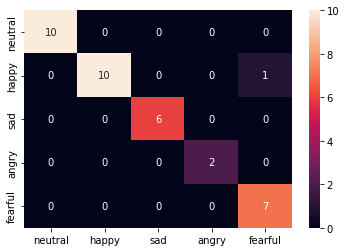

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [25]:
path='/content/drive/My Drive/fusion/savee_fusion_model/KNN/expert4'
savedvX = joblib.dump(knn, path)

print("MODEL SAVED")

MODEL SAVED
